In [1]:
import numpy as np
from tensorflow.keras.optimizers import Adam
# from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.layers import Activation, Dropout, Convolution2D, GlobalAveragePooling2D
from keras.models import Sequential
import tensorflow as tf
import tensorflow.keras.applications.mobilenet
import os
IMG_SAVE_PATH = "Split_smol/train" 
Str_to_Int = {
    'Actinic keratosis': 0,
    'Atopic Dermatitis': 1,
    'Benign keratosis': 2,
    'Dermatofibroma': 3,
    'Melanocytic nevus': 4,
    'Melanoma':5,
    'Squamous cell carcinoma': 6,
    'Tinea Ringworm Candidiasis':7,
    'Vascular lesion': 8
}

NUM_CLASSES = 9


def str_to_Int_mapper(val):
    return Str_to_Int[val]

In [2]:
import PIL
import cv2 

dataset = []
for directory in os.listdir(IMG_SAVE_PATH):
    path = os.path.join(IMG_SAVE_PATH, directory)
    for image in os.listdir(path):
        new_path = os.path.join(path, image)
        try:
            imgpath=PIL.Image.open(new_path)
            #if imgpath.shape!=(240,240,3):
            imgpath=imgpath.convert('RGB')
            img = np.asarray(imgpath)
            img = cv2.resize(img, (240,240))
            img=img/255.
            dataset.append([img, directory]) 
        except FileNotFoundError:
            print('Image file not found. Skipping...')
data, labels = zip(*dataset)
temp = list(map(str_to_Int_mapper, labels))
#data[0]
import keras
labels = keras.utils.to_categorical(temp)
count=0
for i in data:
    if i.shape!=(240, 240, 3):
        count=count+1
print(count)

0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 7, 7, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 9)                   │           9,225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,046,729 (26.88 MB)

 Trainable params: 6,963,081 (26.56 MB)

 Non-trainable params: 83,648 (326.75 KB)

Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 265s 10s/step - accuracy: 0.1327 - loss: 1.1758 - val_accuracy: 0.0071 - val_loss: 1.0668
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 353s 19s/step - accuracy: 0.3289 - loss: 0.8539 - val_accuracy: 0.0286 - val_loss: 1.0799
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 272s 14s/step - accuracy: 0.4784 - loss: 0.6323 - val_accuracy: 0.0357 - val_loss: 1.2041
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 277s 13s/step - accuracy: 0.6210 - loss: 0.4869 - val_accuracy: 0.0357 - val_loss: 1.3267
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 209s 11s/step - accuracy: 0.6593 - loss: 0.3907 - val_accuracy: 0.0500 - val_loss: 1.1955


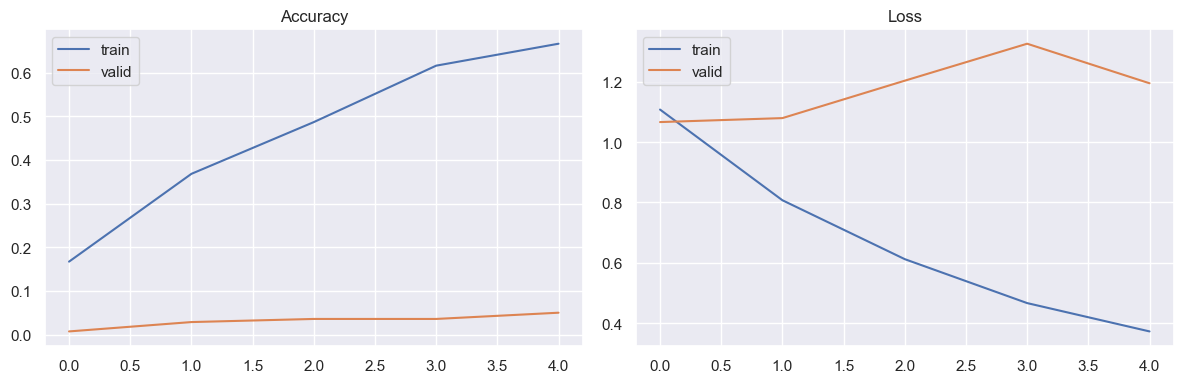

In [3]:
from keras.applications import DenseNet121
from keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras import layers

densenet = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(240,240,3)
)

def build_densenet():
    model = Sequential()
    model.add(densenet)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(9, activation='sigmoid'))
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(learning_rate=0.00005),
        metrics=['accuracy']
    )
    
    return model

model = build_densenet()
model.summary()

history=model.fit(np.array(data), np.array(labels), epochs = 5, shuffle = True, validation_split = 0.2)

import seaborn as sns
from matplotlib import pyplot
    
def plot_acc(history):
    sns.set()

    fig = pyplot.figure(0, (12, 4))

    ax = pyplot.subplot(1, 2, 1)
    sns.lineplot(x=history.epoch, y=history.history['accuracy'], label='train')
    sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], label='valid')
    pyplot.title('Accuracy')
    pyplot.tight_layout()

    ax = pyplot.subplot(1, 2, 2)
    sns.lineplot(x=history.epoch, y=history.history['loss'], label='train')
    sns.lineplot(x=history.epoch, y=history.history['val_loss'], label='valid')
    pyplot.title('Loss')
    pyplot.tight_layout()

    pyplot.show()
plot_acc(history)

C:\Users\vedan\AppData\Local\Temp\ipykernel_58968\720939946.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  tf.keras.applications.mobilenet.MobileNet(input_shape=(240,240, 3), include_top=False),


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 7, 7, 9)             │           9,225 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 7, 7, 9)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 9)                   │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 9)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,238,089 (12.35 MB)

 Trainable params: 3,216,201 (12.27 MB)

 Non-trainable params: 21,888 (85.50 KB)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.2371 - loss: 2.2014 - val_accuracy: 0.0190 - val_loss: 3.0646
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.7534 - loss: 0.8832 - val_accuracy: 0.0048 - val_loss: 3.7295
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9266 - loss: 0.3600 - val_accuracy: 0.0000e+00 - val_loss: 3.9594
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.9746 - loss: 0.1928 - val_accuracy: 0.0000e+00 - val_loss: 3.7346
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9893 - loss: 0.0926 - val_accuracy: 0.0000e+00 - val_loss: 3.8819


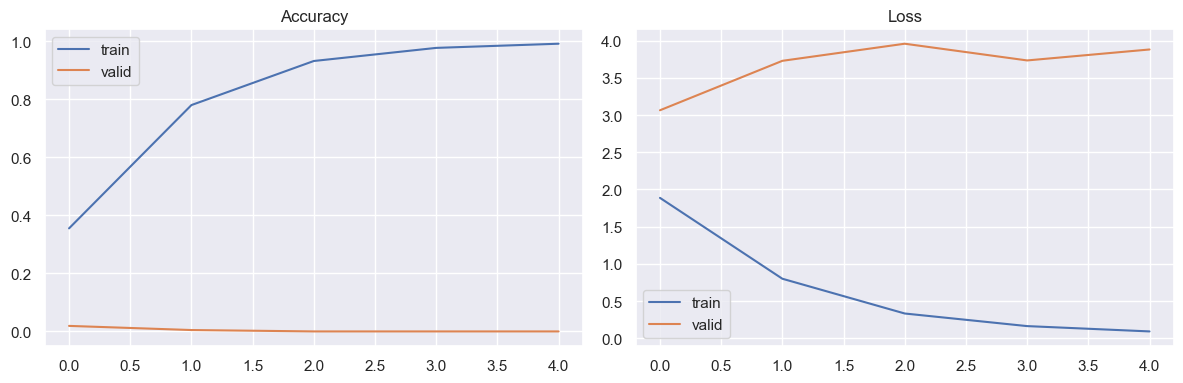

In [4]:
def mobilenet():
    model = Sequential([
        tf.keras.applications.mobilenet.MobileNet(input_shape=(240,240, 3), include_top=False),
        Dropout(0.5),
        Convolution2D(9, (1, 1), padding='valid'),
        Activation('relu'),        # Rectified Linear Unit - Activation Function
        GlobalAveragePooling2D(),  # Pooling Layer
        Activation('softmax')      # Softmax - Activation Function - For Multi Class Classification
    ])
    return model
# define the model
model_mobile = mobilenet()
model_mobile.compile(
    optimizer=Adam(learning_rate=0.0001),         # lr = learning_rate
    loss='categorical_crossentropy',   # Multi-class classification
    metrics=['accuracy']  
)

model_mobile.summary()

history_mobile=model_mobile.fit(np.array(data), np.array(labels), epochs = 5, shuffle = True, validation_split = 0.3)

plot_acc(history_mobile)

C:\Users\vedan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 238, 238, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 236, 236, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 118, 118, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 118, 118, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 116, 116, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 58, 58, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,621,561 (6.19 MB)

 Trainable params: 1,621,561 (6.19 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 347ms/step - accuracy: 0.1549 - loss: 2.1484 - val_accuracy: 0.0000e+00 - val_loss: 2.6485
Epoch 2/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 314ms/step - accuracy: 0.1865 - loss: 2.0364 - val_accuracy: 0.0000e+00 - val_loss: 2.5211
Epoch 3/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 315ms/step - accuracy: 0.1701 - loss: 2.0219 - val_accuracy: 0.0000e+00 - val_loss: 2.5207
Epoch 4/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 326ms/step - accuracy: 0.1905 - loss: 1.9743 - val_accuracy: 0.0000e+00 - val_loss: 2.5750
Epoch 5/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 314ms/step - accuracy: 0.2534 - loss: 1.9230 - val_accuracy: 0.0000e+00 - val_loss: 2.6611


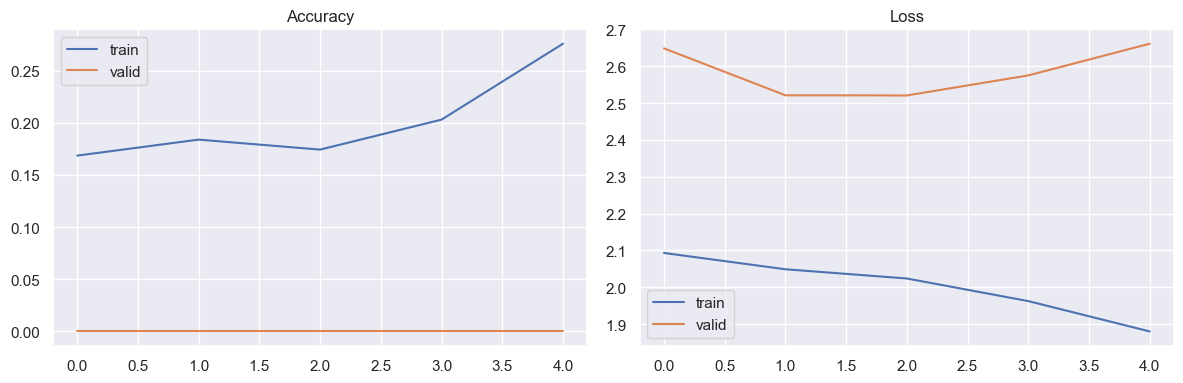

In [5]:
def cnn():
    model=Sequential()

    model.add(Conv2D(8, kernel_size=(3,3), activation='relu', input_shape=(240,240,3)))
    model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(9, activation='softmax'))
    
    return model
from keras.layers import Dense , Dropout , Conv2D , MaxPooling2D, Flatten
model_cnn=cnn()
model_cnn.compile(
    optimizer=Adam(learning_rate=0.0001),         # lr = learning_rate
    loss='categorical_crossentropy',   # Multi-class classification
    metrics=['accuracy']  
)
model_cnn.summary()

history_cnn=model_cnn.fit(np.array(data), np.array(labels), epochs = 5, shuffle = True, validation_split = 0.25)

plot_acc(history_cnn)

In [6]:
# save the model for later use
model.save("skin_disease_model_ISIC_densenet.h5")

In [7]:
IMG_SAVE_PATH_TESTING = "Split_smol/val"
import os
import PIL
import cv2
dataset_testing = []
for directory in os.listdir(IMG_SAVE_PATH_TESTING):
    path = os.path.join(IMG_SAVE_PATH_TESTING, directory)
    for image in os.listdir(path):
        new_path = os.path.join(path, image)
        imgpath=PIL.Image.open(new_path)
        #if imgpath.shape!=(240,240,3):
        imgpath=imgpath.convert('RGB')
        img = np.asarray(imgpath)
#         img = cv2.imread(new_path)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (240, 240))
        img=img/255.
        dataset_testing.append([img, directory]) 
testing_data, testing_labels = zip(*dataset_testing)
testing_temp = list(map(str_to_Int_mapper, testing_labels))
import keras
testing_labels = keras.utils.to_categorical(testing_temp)
model.evaluate(np.array(testing_data), np.array(testing_labels))
model_mobile.evaluate(np.array(testing_data), np.array(testing_labels))
model_cnn.evaluate(np.array(testing_data), np.array(testing_labels))

6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.3922 - loss: 0.9107
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 475ms/step - accuracy: 0.5796 - loss: 1.5070
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.2952 - loss: 2.0242


[2.1452736854553223, 0.2541436553001404]

6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step


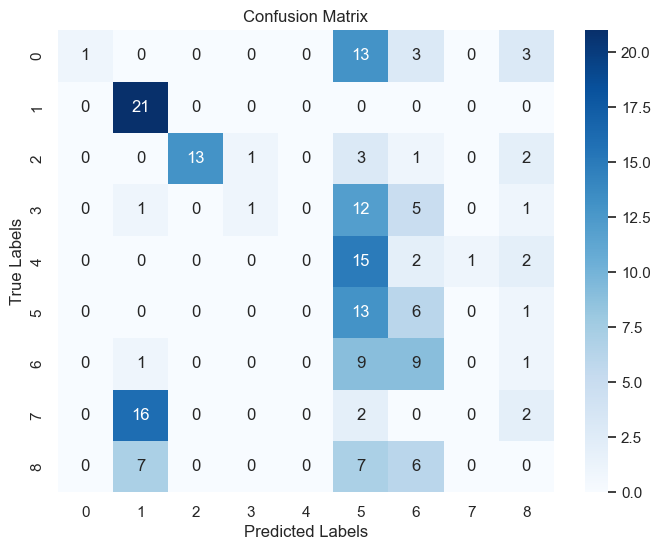

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 565ms/step


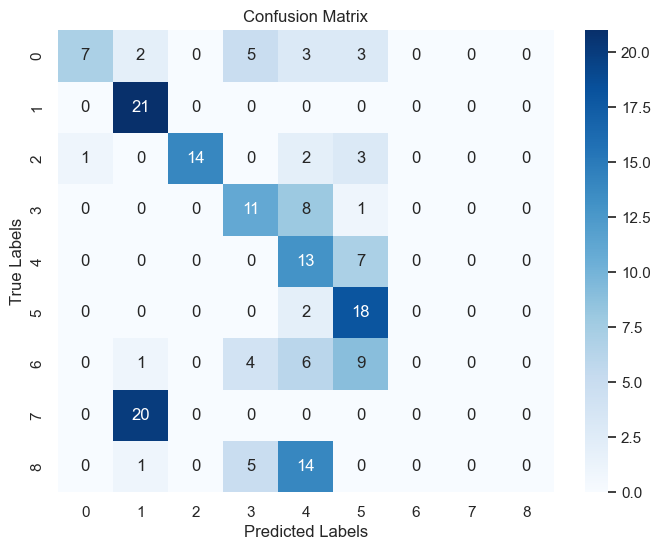

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


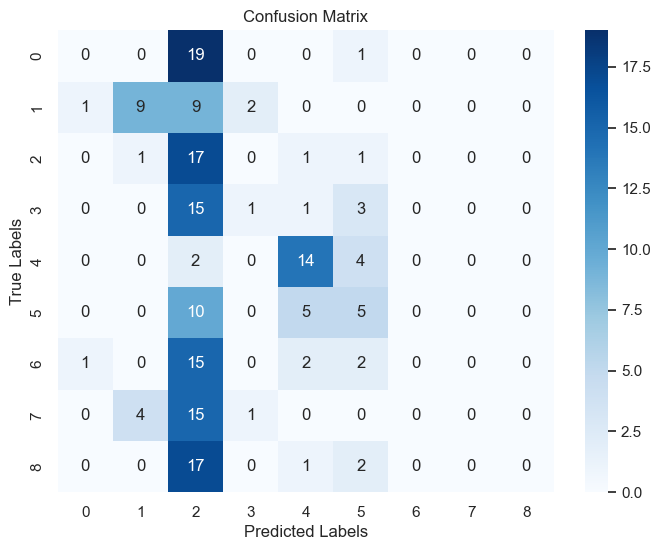

In [8]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions
def make_preds(model, testing_data, testing_labels):
    label_preds = model.predict(np.array(testing_data))

    def one_hot_highest(arr):
        arr = np.array(arr)
        max_indices = np.argmax(arr, axis=1)
        one_hot = np.zeros_like(arr)
        one_hot[np.arange(len(arr)), max_indices] = 1
        return one_hot

    # Convert predictions and true labels to one-hot encoded form
    arr = one_hot_highest(label_preds)
    arr2 = one_hot_highest(testing_labels)

    # Convert one-hot encoding to categorical labels
    labelenc = np.argmax(arr, axis=1)
    labelenctest = np.argmax(arr2, axis=1)

    # Generate confusion matrix
    cm = confusion_matrix(labelenctest, labelenc)

    # Plot confusion matrix using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(9), yticklabels=range(9))
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

# Call the function with models
make_preds(model, testing_data, testing_labels)
make_preds(model_mobile, testing_data, testing_labels)
make_preds(model_cnn, testing_data, testing_labels)


In [2]:
# !pip install streamlit
import streamlit as st
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image


model = tf.keras.models.load_model("skin_disease_model_ISIC_densenet.h5")


CLASS_NAMES = ["Actinic keratosis", "Atopic Dermatitis", "Benign keratosis", 
               "Dermatofibroma", "Melanocytic nevus", "Melanoma", 
               "Squamous cell carcinoma", "Tinea Ringworm Candidiasis", "Vascular lesion"]


def preprocess_image(image):
    image = np.array(image)
    image = cv2.resize(image, (224, 224))  
    image = image / 255.0  
    image = np.expand_dims(image, axis=0)  
    return image


st.title("🩺 Skin Disease Classifier")
st.write("Upload an image of a skin lesion, and the model will predict the disease.")


uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Image", use_column_width=True)

    
    processed_image = preprocess_image(image)
    prediction = model.predict(processed_image)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction) * 100  

    
    st.subheader("🔍 Prediction")
    st.write(f"**Class:** {CLASS_NAMES[predicted_class]}")
    st.write(f"**Confidence:** {confidence:.2f}%")

2025-03-07 21:29:30.486 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-07 21:29:31.658 
  command:

    streamlit run C:\Users\vedan\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-07 21:29:31.659 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-07 21:29:31.660 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-07 21:29:31.661 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-07 21:29:31.662 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-07 21:29:31.663 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-07 21:29:

In [1]:
import streamlit as st
print("Streamlit is installed successfully!")

Streamlit is installed successfully!


In [2]:
!pip install streamlit

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import sys
print(sys.executable)

C:\Users\vedan\AppData\Local\Programs\Python\Python312\python.exe


In [4]:
!"C:\Users\vedan\AppData\Local\Programs\Python\Python312\python.exe" -m pip install streamlit

  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached cachetools-5.5.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached watchdog-6.0.0-py3-none-win_amd64.whl.metadata (44 kB)
  Using cached GitPython-3.1.44-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.7 MB 1.7 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/9.7 MB 1.7 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/9.7 MB 1.7


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\vedan\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [1]:
!pip install flask


Defaulting to user installation because normal site-packages is not writeable
